In [1]:
# import the necessary modules
import pandas as pd
import numpy as np
import os
#waveform-database:A library of tools for reading, writing, and processing WFDB signals and annotations.
import wfdb 

%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
a = 1
a

1

In [2]:
mlp.rc("xtick",labelsize=12)
mlp.rc("ytick",labelsize=12)
mlp.rc("axes",labelsize=14)

MAIN_PATH = "/Users/key/Documents/MachineLearning/ECG-Arrhythmia-main"
DATA_PATH = "/Users/key/Documents/MachineLearning/ECG-Arrhythmia-main/mit-database"
FIG_PATH="/Users/key/Documents/MachineLearning/ECG-Arrhythmia-main"
FIGURE_PATH = os.path.join(FIG_PATH,"saved_figures")
os.makedirs("saved_figures",exist_ok=True)
os.chdir(DATA_PATH)

#a function to save plotted figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(FIGURE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [3]:
sample = wfdb.io.rdsamp("100")
print(sample)
print("\nShape of data: ",sample[0].shape)
print("\nData: ",sample[0])
print("\nType of data: ",type(sample[0]))


(array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]]), {'fs': 360, 'sig_len': 650000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V5'], 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']})

Shape of data:  (650000, 2)

Data:  [[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]

Type of data:  <class 'numpy.ndarray'>


Saving figure MLII and V5 100


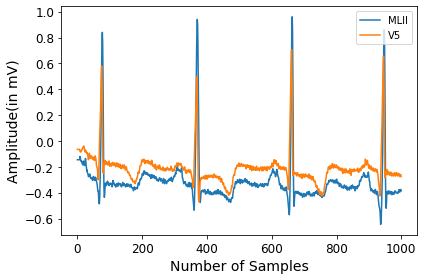

In [4]:
sample_MLII = sample[0][:,0]
sample_V5 = sample[0][:,1]
plt.plot(sample_MLII[:1000])
plt.plot(sample_V5[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.legend(("MLII","V5"),loc="upper right")
save_fig("MLII and V5 100")


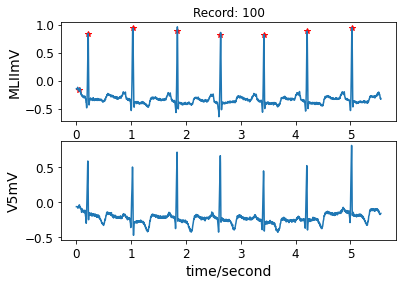

{'record_name': '100', 'extension': 'atr', 'sample': array([  18,   77,  370,  662,  946, 1231, 1515, 1809]), 'symbol': ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], 'subtype': array([0, 0, 0, 0, 0, 0, 0, 0]), 'chan': array([0, 0, 0, 0, 0, 0, 0, 0]), 'num': array([0, 0, 0, 0, 0, 0, 0, 0]), 'aux_note': ['(N\x00', '', '', '', '', '', '', ''], 'fs': 360, 'label_store': None, 'description': None, 'custom_labels': None, 'contained_labels': None, 'ann_len': 8}


In [5]:
a = wfdb.rdann("100","atr",sampto=2000)
r = wfdb.rdrecord("100",sampto=2000)
wfdb.plot_wfdb(record=r,annotation=a,time_units="seconds")
print(a.__dict__)


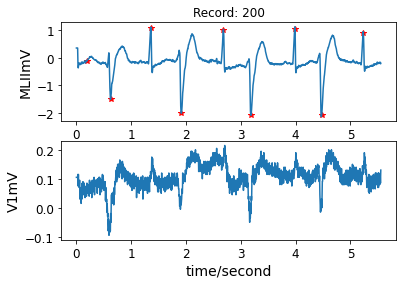

{'record_name': '200', 'extension': 'atr', 'sample': array([  67,  225,  487,  689,  964, 1147, 1433, 1610, 1882]), 'symbol': ['+', 'V', 'N', 'V', 'N', 'V', 'N', 'V', 'N'], 'subtype': array([0, 1, 0, 1, 0, 1, 0, 1, 0]), 'chan': array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 'num': array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 'aux_note': ['(B\x00', '', '', '', '', '', '', '', ''], 'fs': 360, 'label_store': None, 'description': None, 'custom_labels': None, 'contained_labels': None, 'ann_len': 9}


In [6]:
a = wfdb.rdann("200","atr",sampto=2000)
r = wfdb.rdrecord("200",sampto=2000)
wfdb.plot_wfdb(record=r,annotation=a,time_units="seconds")
print(a.__dict__)

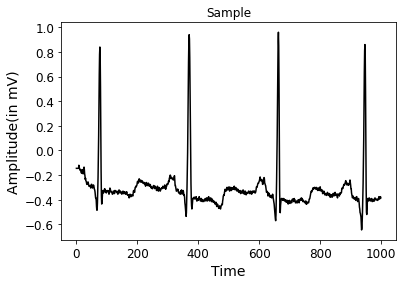

In [7]:
#self designing graph
plt.plot(sample_MLII[:1000], color = 'black')
plt.xlabel("Time")
plt.ylabel("Amplitude(in mV)")
plt.title("Sample")
plt.rcParams["figure.figsize"] = (15,10)
#save_fig("101-MLII.png")

Saving figure 101-V5.png


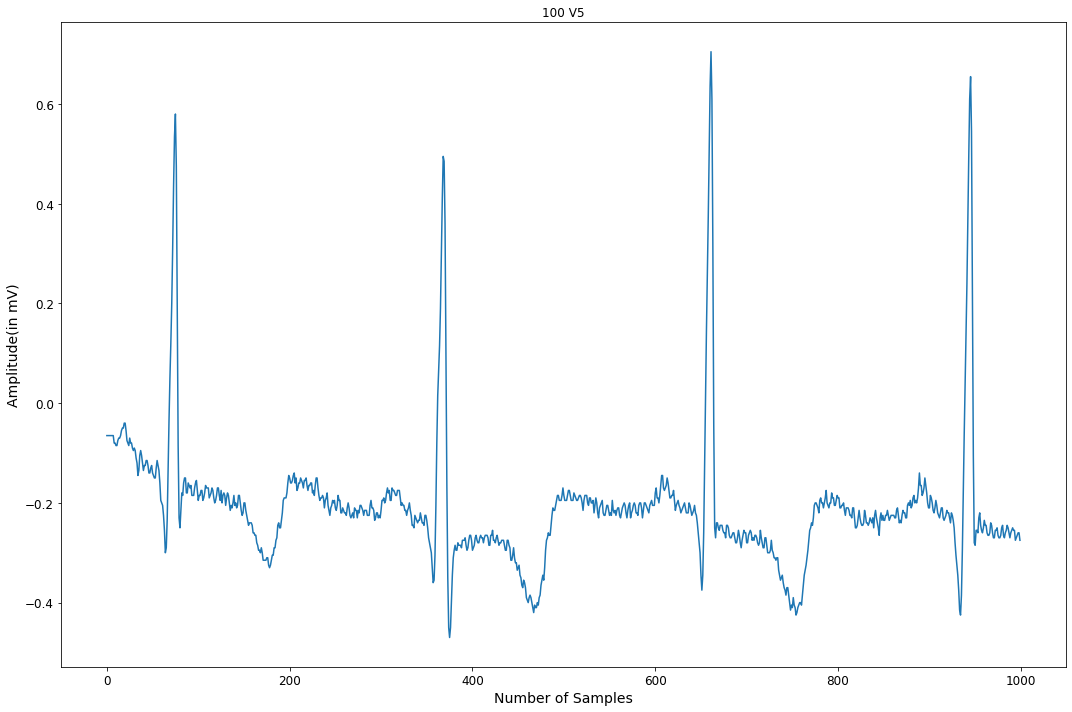

In [8]:
plt.plot(sample_V5[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 V5")

save_fig("101-V5.png")

Saving figure 101-V5.png


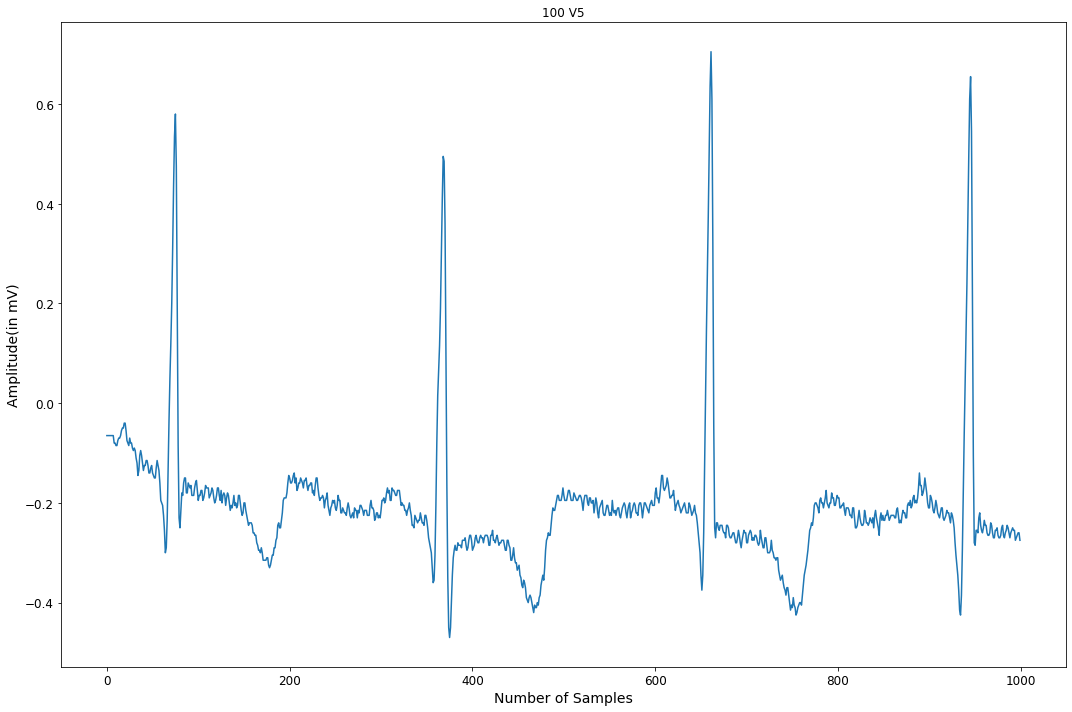

In [9]:
plt.plot(sample_V5[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 V5")

save_fig("101-V5.png")



In [10]:
# RECORDS file contains all the record names of the corresponding patients
records = np.loadtxt(os.path.join(DATA_PATH,"RECORDS"), dtype=str)

print(records)
print(len(records))

['100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '121' '122' '123' '124' '200'
 '201' '202' '203' '205' '207' '208' '209' '210' '212' '213' '214' '215'
 '217' '219' '220' '221' '222' '223' '228' '230' '231' '232' '233' '234']
48


In [11]:
def read_data():
    dataset = []
    for record in records:
        temp = wfdb.rdrecord(record)
        dataset.append(temp.p_signal)
    return dataset

Saving figure 234-MLII.png


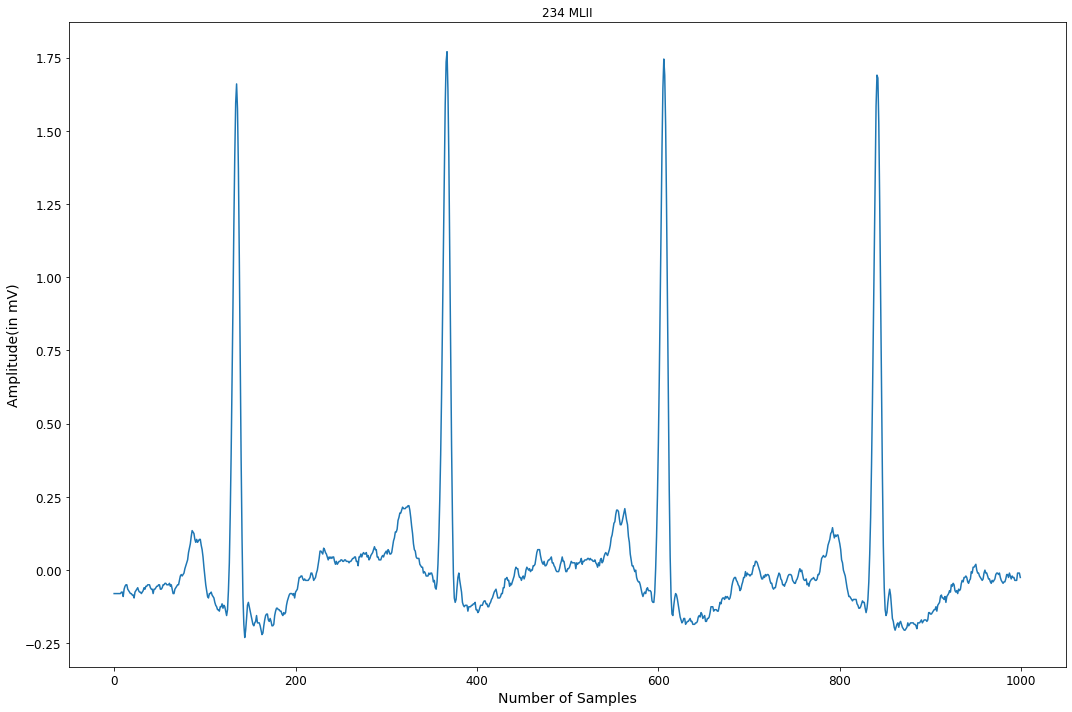

In [12]:
dataset = read_data()
dataset[47]

#Plotting the last record MLII data
plt.plot(dataset[47][:1000,0])

plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 MLII")

save_fig("234-MLII.png")

Saving figure 234-V5.png


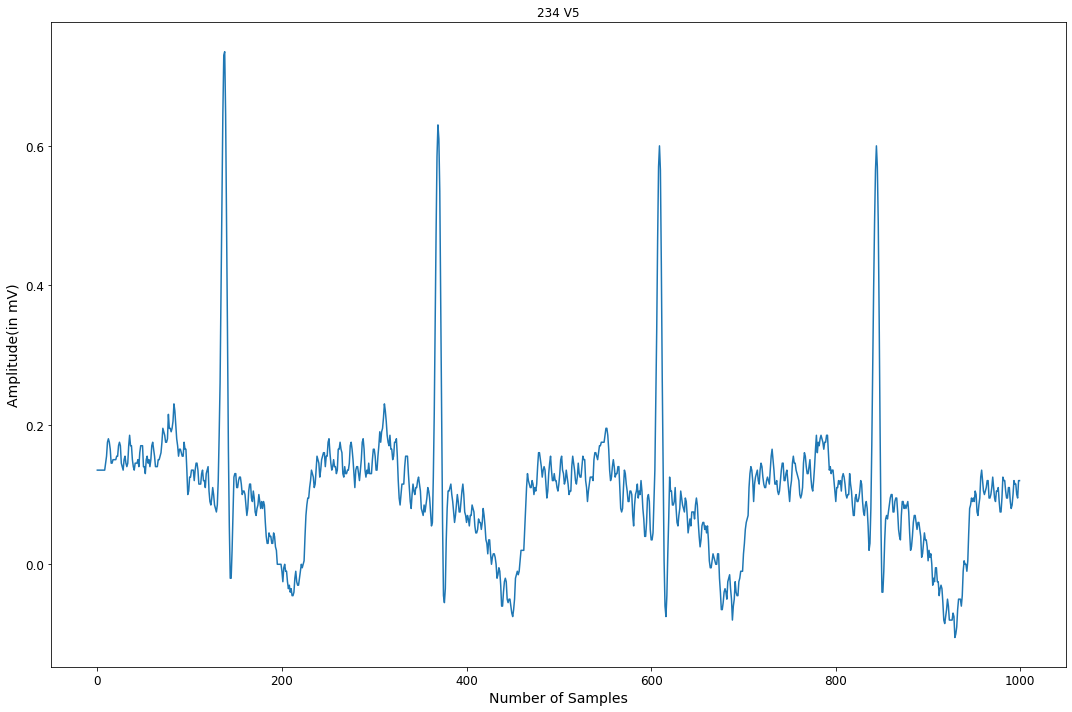

In [13]:
#PLotting the last record V5 data
plt.plot(dataset[47][:1000,1])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 V5")

save_fig("234-V5.png")

In [14]:
#Showing all the labels present in our data
wfdb.io.show_ann_labels()


    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [15]:
invalid_beat = [
    "[", "!", "]", "x", "(", ")", "p", "t", 
    "u", "`", "'", "^", "|", "~", "+", "s", 
    "T", "*", "D", "=",'"', "@", "B", "a", "J", "S",
    "r", "F", "e", "j", "n", "f", "Q", "?"
]

label_beats=[
    "A", "L", "/", "V", "R", "E", "N"
]

In [22]:
import random
import numpy

In [26]:
def classify(symbol):
    if symbol in label_beats:
        return 1
    else:
        return 0
    
def segment(signal_MLII, beat_loc):
    window=180
    count=1
    x=beat_loc-window
    y=beat_loc+window
    samp=signal_MLII[x:y]
    return samp

all_signals=[]
all_labels=[]

list1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for record in records:
    temp=wfdb.rdrecord(record)
    annot_temp=wfdb.rdann(record, 'atr')
    ann_sample=annot_temp.sample
    ann_symbol=annot_temp.symbol
    fs=temp.fs
    signal=temp.p_signal
    signal_MLII=signal[:,0]
    for i, i_sample in enumerate(ann_sample):
        label_dec=classify(ann_symbol[i])
        segmentation=segment(signal_MLII, i_sample)
        if label_dec==1 and len(segmentation)==360:
            all_signals.append(segmentation)
            all_labels.append(ann_symbol[i])

all_signals_new = []
all_labels_new = []
index = 0
while index < len(all_labels):
    if random.choice(list1) < 4: 
        all_signals_new.append(all_signals[index])
        all_labels_new.append(all_labels[index])
    index += 1
all_signals = all_signals_new
all_labels = all_labels_new


In [28]:

print(len(all_signals))

print(len(all_labels))

31891
31891


In [29]:
print(len(all_signals))
print(len(records))

31891
48


In [30]:
# vstack Stacks arrays in sequence vertically (row wise).
all_signals_fin=np.vstack(all_signals)

print(len(all_signals_fin))


31891


In [31]:
# 30% data
# np.random.choice(all_signals_fin, len(all_signals_fin) * 0.3)
# import numpy
# mask = numpy.random.choice([False, True], len(all_signals_fin), p=[0.7, 0.3])
# all_signals_fin = all_signals_fin[mask]

#print(len(all_signals_fin[mask]))

In [32]:
print(all_signals_fin.shape)

(31891, 360)


N


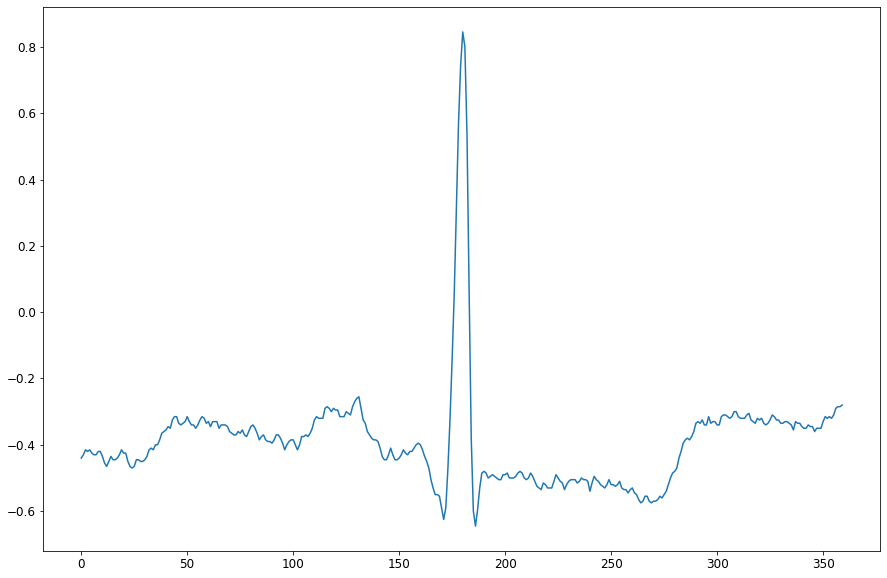

In [33]:
#PLotting
plt.plot(all_signals_fin[187])
print(all_labels[187])

In [34]:
labels_fin=pd.Series(all_labels)

In [35]:
for i, value in enumerate(labels_fin):
    if value=='E':
        print(value)
        print(i)
        break

E
18092


Saving figure Ventricular Escape Beat.png


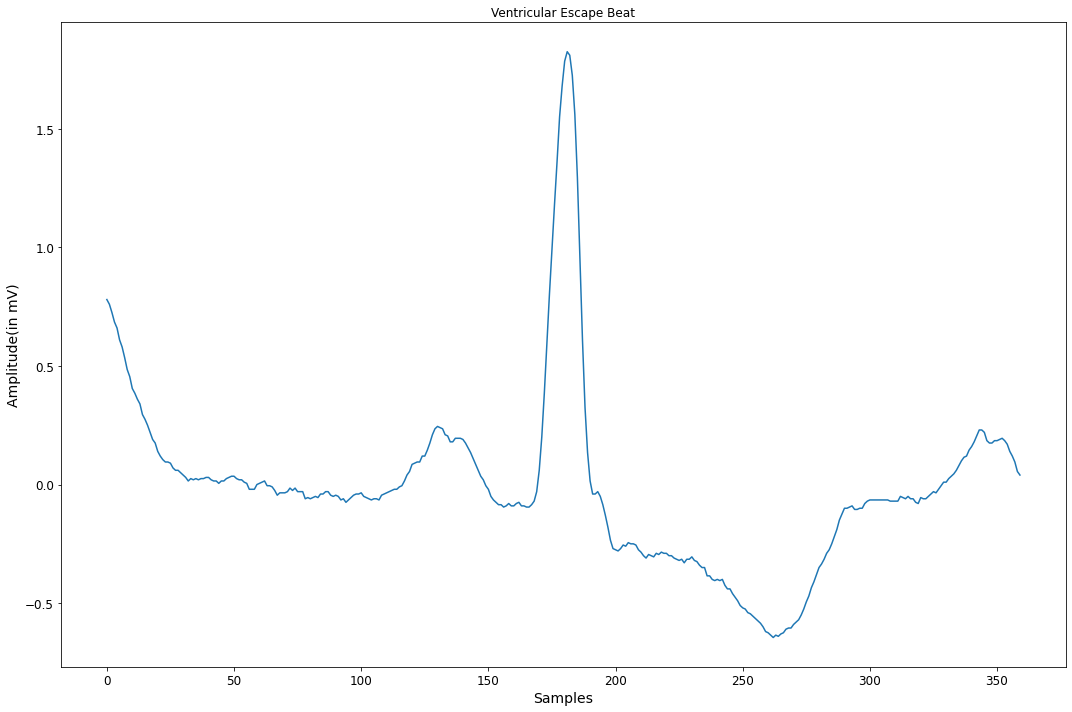

In [38]:
plt.plot(all_signals_fin[30641])
plt.xlabel('Samples')
plt.ylabel('Amplitude(in mV)')
plt.title('Ventricular Escape Beat')
save_fig("Ventricular Escape Beat.png")

In [39]:
len(all_signals_fin)
labels_array=np.array(all_labels)

#df_0=all_signals_fin[labels_fin=='/']
df_1=all_signals_fin[labels_fin=='N']
#df_2=all_signals_fin[labels_fin=='E']
df_3=all_signals_fin[labels_fin=='L']
df_4=all_signals_fin[labels_fin=='A']
df_5=all_signals_fin[labels_fin=='R']
df_6=all_signals_fin[labels_fin=='V']
y_df1=labels_array[labels_fin=='/']
print(len(df_1))
print(y_df1)
len(y_df1)

22278
['/' '/' '/' ... '/' '/' '/']


2051

In [40]:
#print(len(df_0))
print(len(df_1))
#print(len(df_2))
print(len(df_3))
print(len(df_4))
print(len(df_5))
print(len(df_6))

22278
2396
746
2206
2175


In [41]:
X_final=[]
#X_final.extend(df_0)
X_final.extend(df_1)
#X_final.extend(df_2)
X_final.extend(df_3)
X_final.extend(df_4)
X_final.extend(df_5)
X_final.extend(df_6)


In [42]:
#y_0=['/']*len(df_0)
y_1=['N']*len(df_1)
#y_2=['E']*len(df_2)
y_3=['L']*len(df_3)
y_4=['A']*len(df_4)
y_5=['R']*len(df_5)
y_6=['V']*len(df_6)
y_final=[]
#y_final.extend(y_0)
y_final.extend(y_1)
#y_final.extend(y_2)
y_final.extend(y_3)
y_final.extend(y_4)
y_final.extend(y_5)
y_final.extend(y_6)

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit
strad=StratifiedShuffleSplit()

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(X_final)
assin_strad=strad.split(scaled, y_final)

In [45]:
assin_strad=strad.split(scaled, y_final)


In [46]:
train_index, test_index=next(assin_strad)

In [47]:
train_data_scaled=scaled[train_index]

In [48]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
y_final

['N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [49]:
labels_final=lab.fit_transform(y_final)

In [50]:
lab.classes_

array(['A', 'L', 'N', 'R', 'V'], dtype='<U1')

In [51]:
train_label=labels_final[train_index]

In [52]:
test_data_scaled=scaled[test_index]

In [53]:
test_labels=labels_final[test_index]

In [54]:
def check_strat(y):
    dummy = pd.DataFrame(y,columns=["Labels"])
    print("Value distribution:\n")
    count = dummy["Labels"].value_counts()
    percent = dummy["Labels"].value_counts(normalize=True).mul(100).round(2)
    print(pd.concat([count,percent],axis=1,keys=["Counts","Percent"]))

In [55]:
check_strat(test_labels)

Value distribution:

   Counts  Percent
2    2228    74.74
1     240     8.05
3     221     7.41
4     217     7.28
0      75     2.52


In [56]:
from sklearn.svm import SVC
cls=SVC(verbose=3)
cls.fit(train_data_scaled, train_label.flatten())

[LibSVM]*
optimization finished, #iter = 645
obj = -175.566176, rho = -0.018599
nSV = 349, nBSV = 232
.
*.*
optimization finished, #iter = 2084
obj = -755.850686, rho = 0.849446
nSV = 1183, nBSV = 895
*
optimization finished, #iter = 743
obj = -291.520728, rho = -0.790674
nSV = 509, nBSV = 389
*
optimization finished, #iter = 668
obj = -176.080289, rho = 0.935975
nSV = 371, nBSV = 212
.*
optimization finished, #iter = 1834
obj = -626.641406, rho = 1.146094
nSV = 1087, nBSV = 882
*
optimization finished, #iter = 567
obj = -137.114101, rho = -0.508588
nSV = 276, nBSV = 196
*
optimization finished, #iter = 925
obj = -267.243654, rho = 1.214217
nSV = 499, nBSV = 349
*.*
optimization finished, #iter = 1430
obj = -451.363645, rho = -1.771898
nSV = 754, nBSV = 574
.*
optimization finished, #iter = 1908
obj = -515.266077, rho = -0.068732
nSV = 1061, nBSV = 545
*
optimization finished, #iter = 603
obj = -145.884579, rho = 1.309746
nSV = 294, nBSV = 184
Total nSV = 3910


SVC(verbose=3)

In [57]:
print(train_label[1])

3


In [58]:
cls.predict([train_data_scaled[1]])

array([3])

In [59]:
#Accuracy of SVM Classifier
from sklearn.metrics import accuracy_score
#acc=accuracy_score(train_label, cls.predict(train_data_scaled))
#print(acc)

In [60]:
import seaborn


<AxesSubplot:>

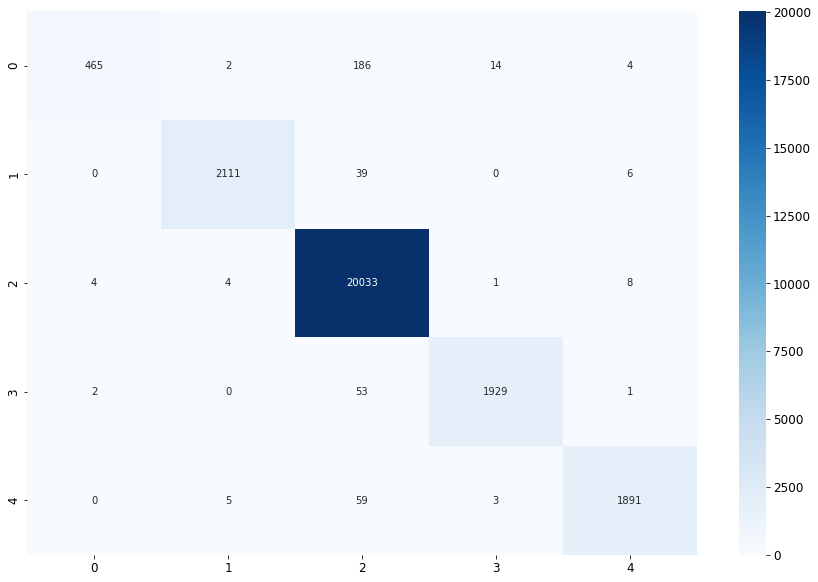

In [61]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(train_label, cls.predict(train_data_scaled))
#con_mat = confusion_matrix(Y_test, Y_pred)
seaborn.heatmap(confusion_matrix(train_label,cls.predict(train_data_scaled)), annot=True, fmt='.20g', cmap='Blues')


<AxesSubplot:>

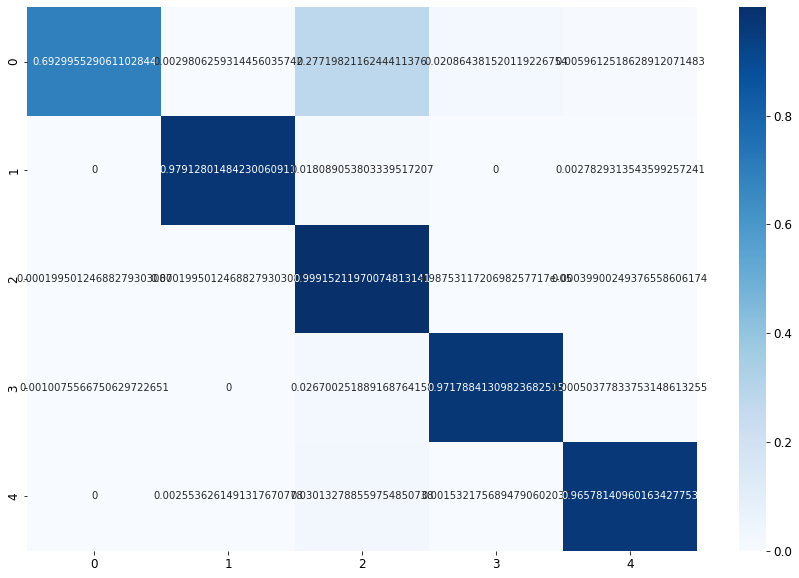

In [63]:
seaborn.heatmap(confusion_matrix(train_label,cls.predict(train_data_scaled),normalize="true"), annot=True, fmt='.20g', cmap='Blues')